In [2]:
import random
import os
import torch
import numpy as np
import librosa
import uuid
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

c:\Users\admin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Load Model

In [3]:
model_path = "C:/Users/admin/RVC-Voice-Lab/models/base/base.pth"
m = torch.load(model_path, map_location="cpu")
emb = m["model"]["emb_g.weight"]
print(f"Is a voice lab model: {'voice_lab' in m.keys()}")

Is a voice lab model: True


# Plot PCA components

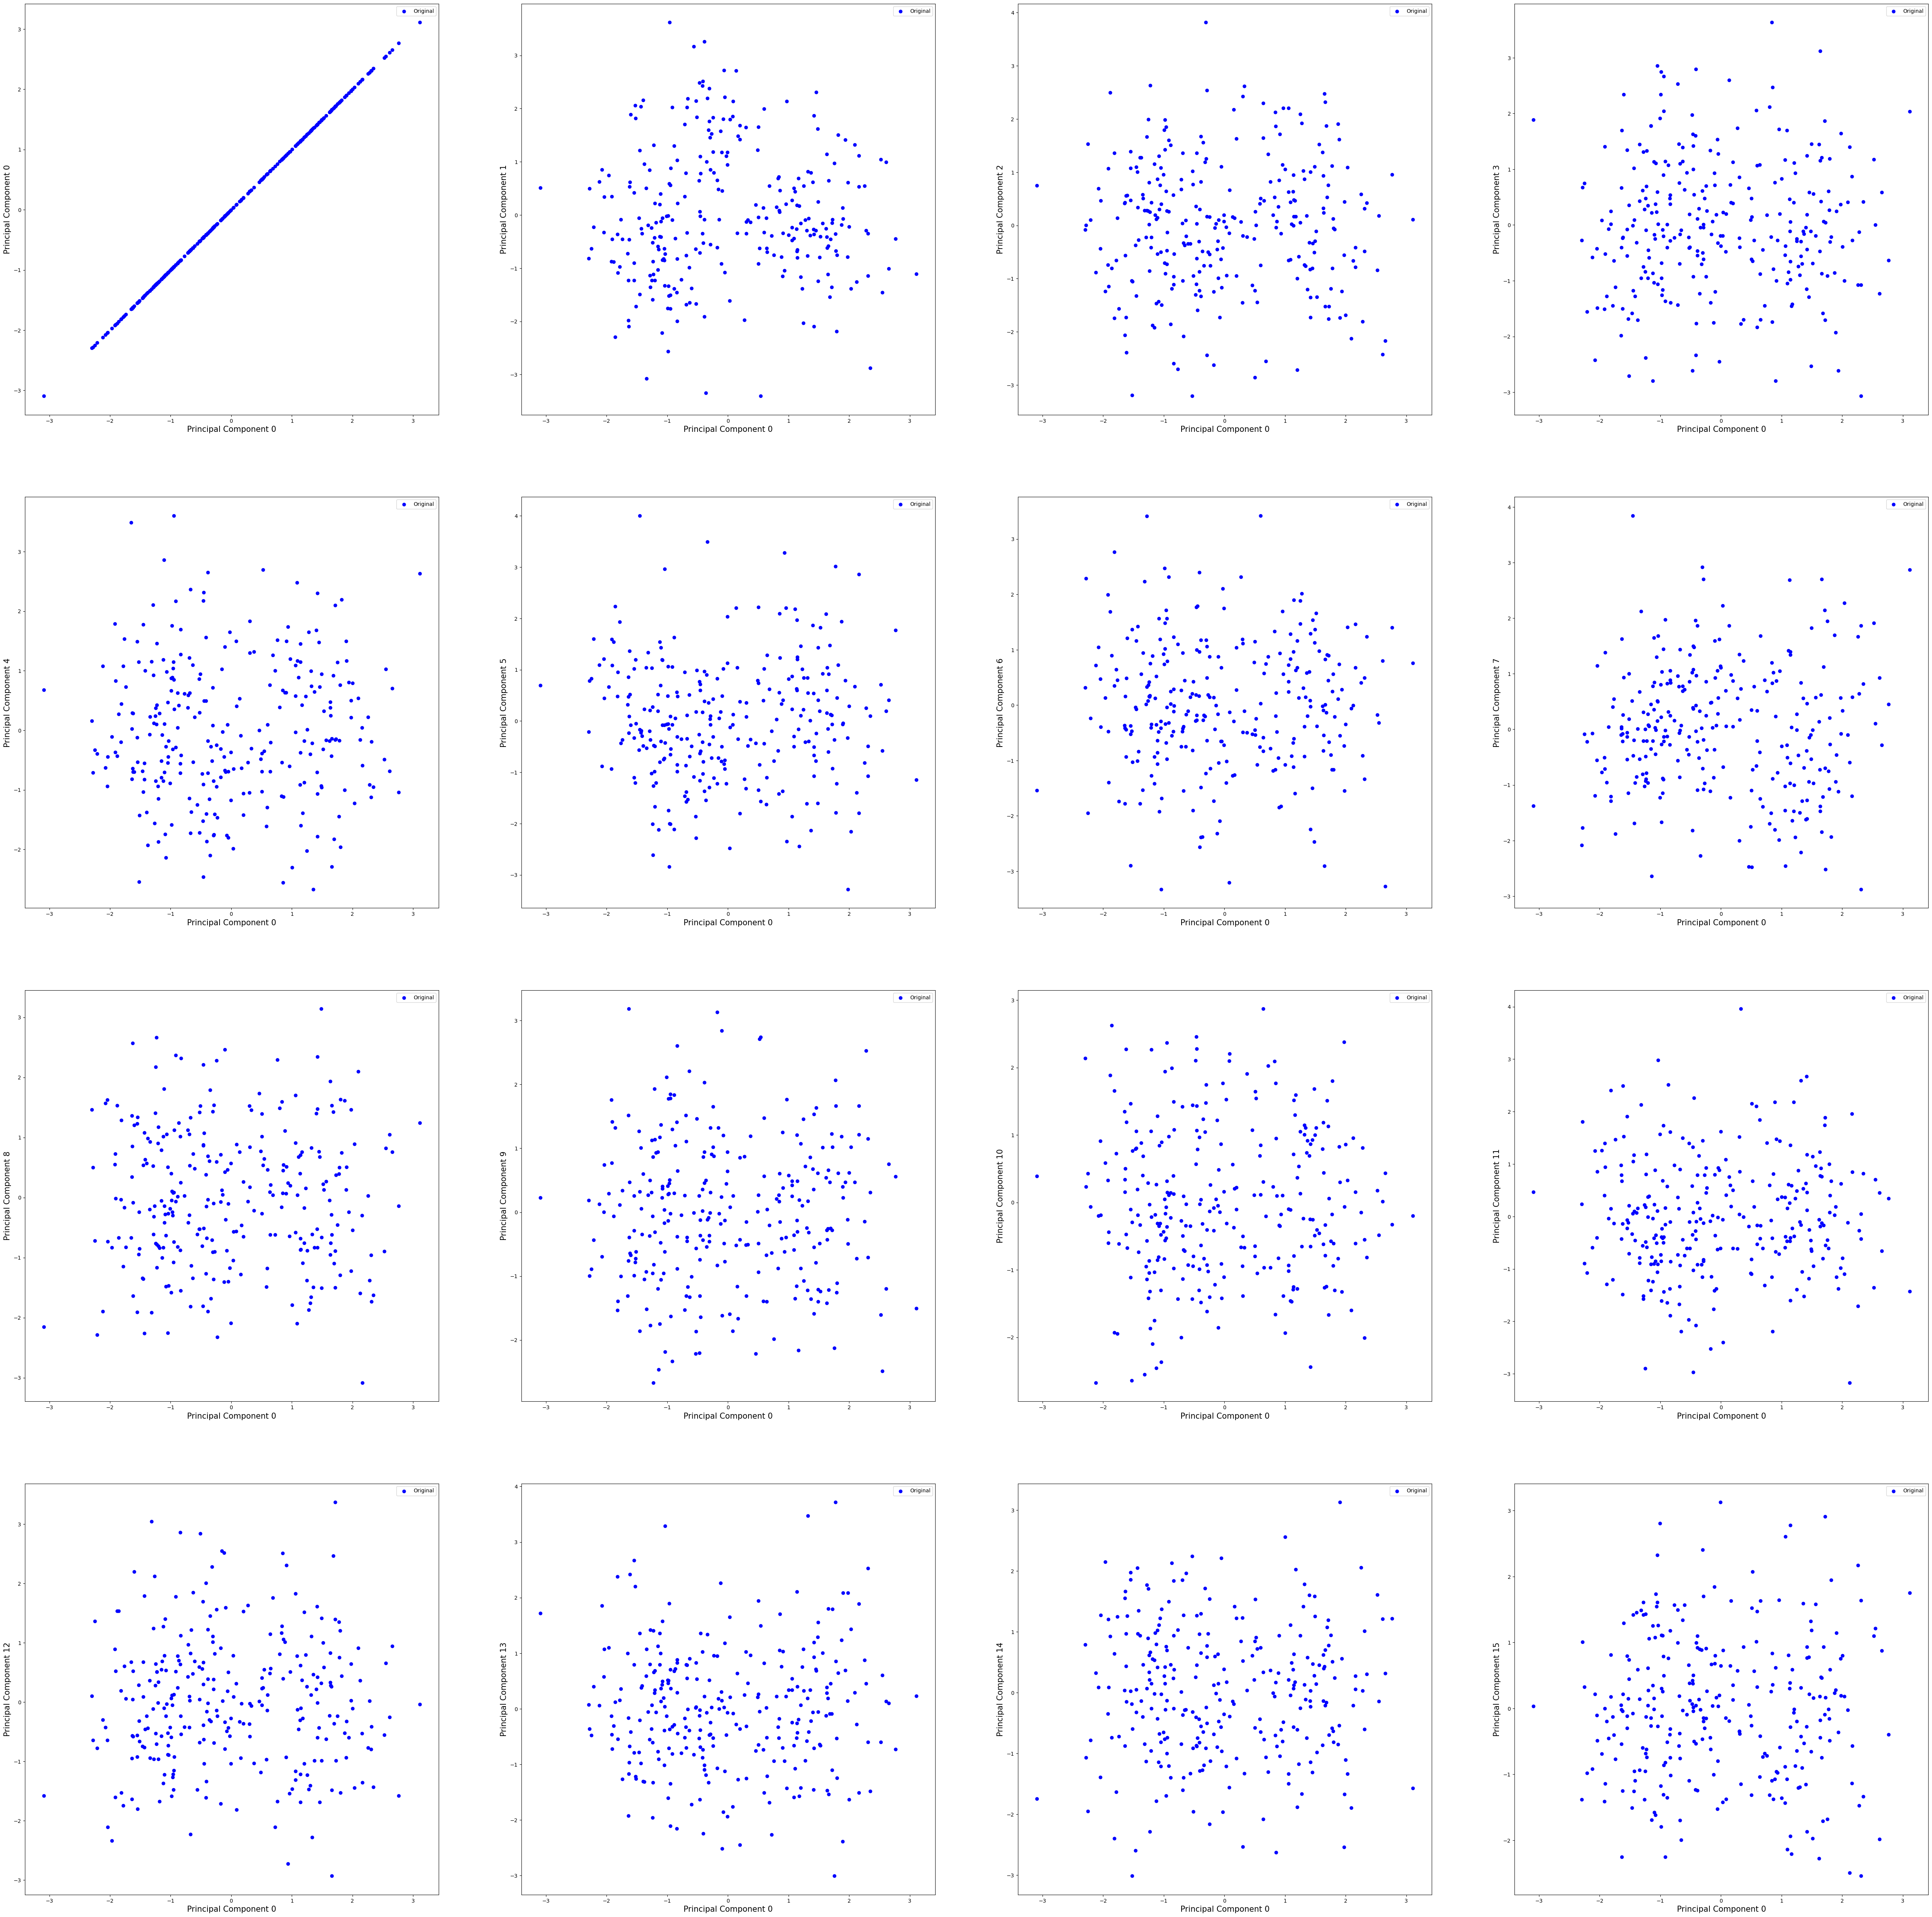

In [4]:
num_components = 32

pca = PCA(n_components=num_components)
reduced = pca.fit_transform(emb)

fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(65,65)

i = 0
for row in ax:
    for col in row:
        col.set_xlabel('Principal Component '+str(0), fontsize = 15)
        col.set_ylabel('Principal Component '+str(i), fontsize = 15)
        col.scatter(reduced[:,0], reduced[:,i], c="b", label="Original")
        col.legend(loc='upper right')
        i += 1
plt.show()

# Plot PCA components and new generated

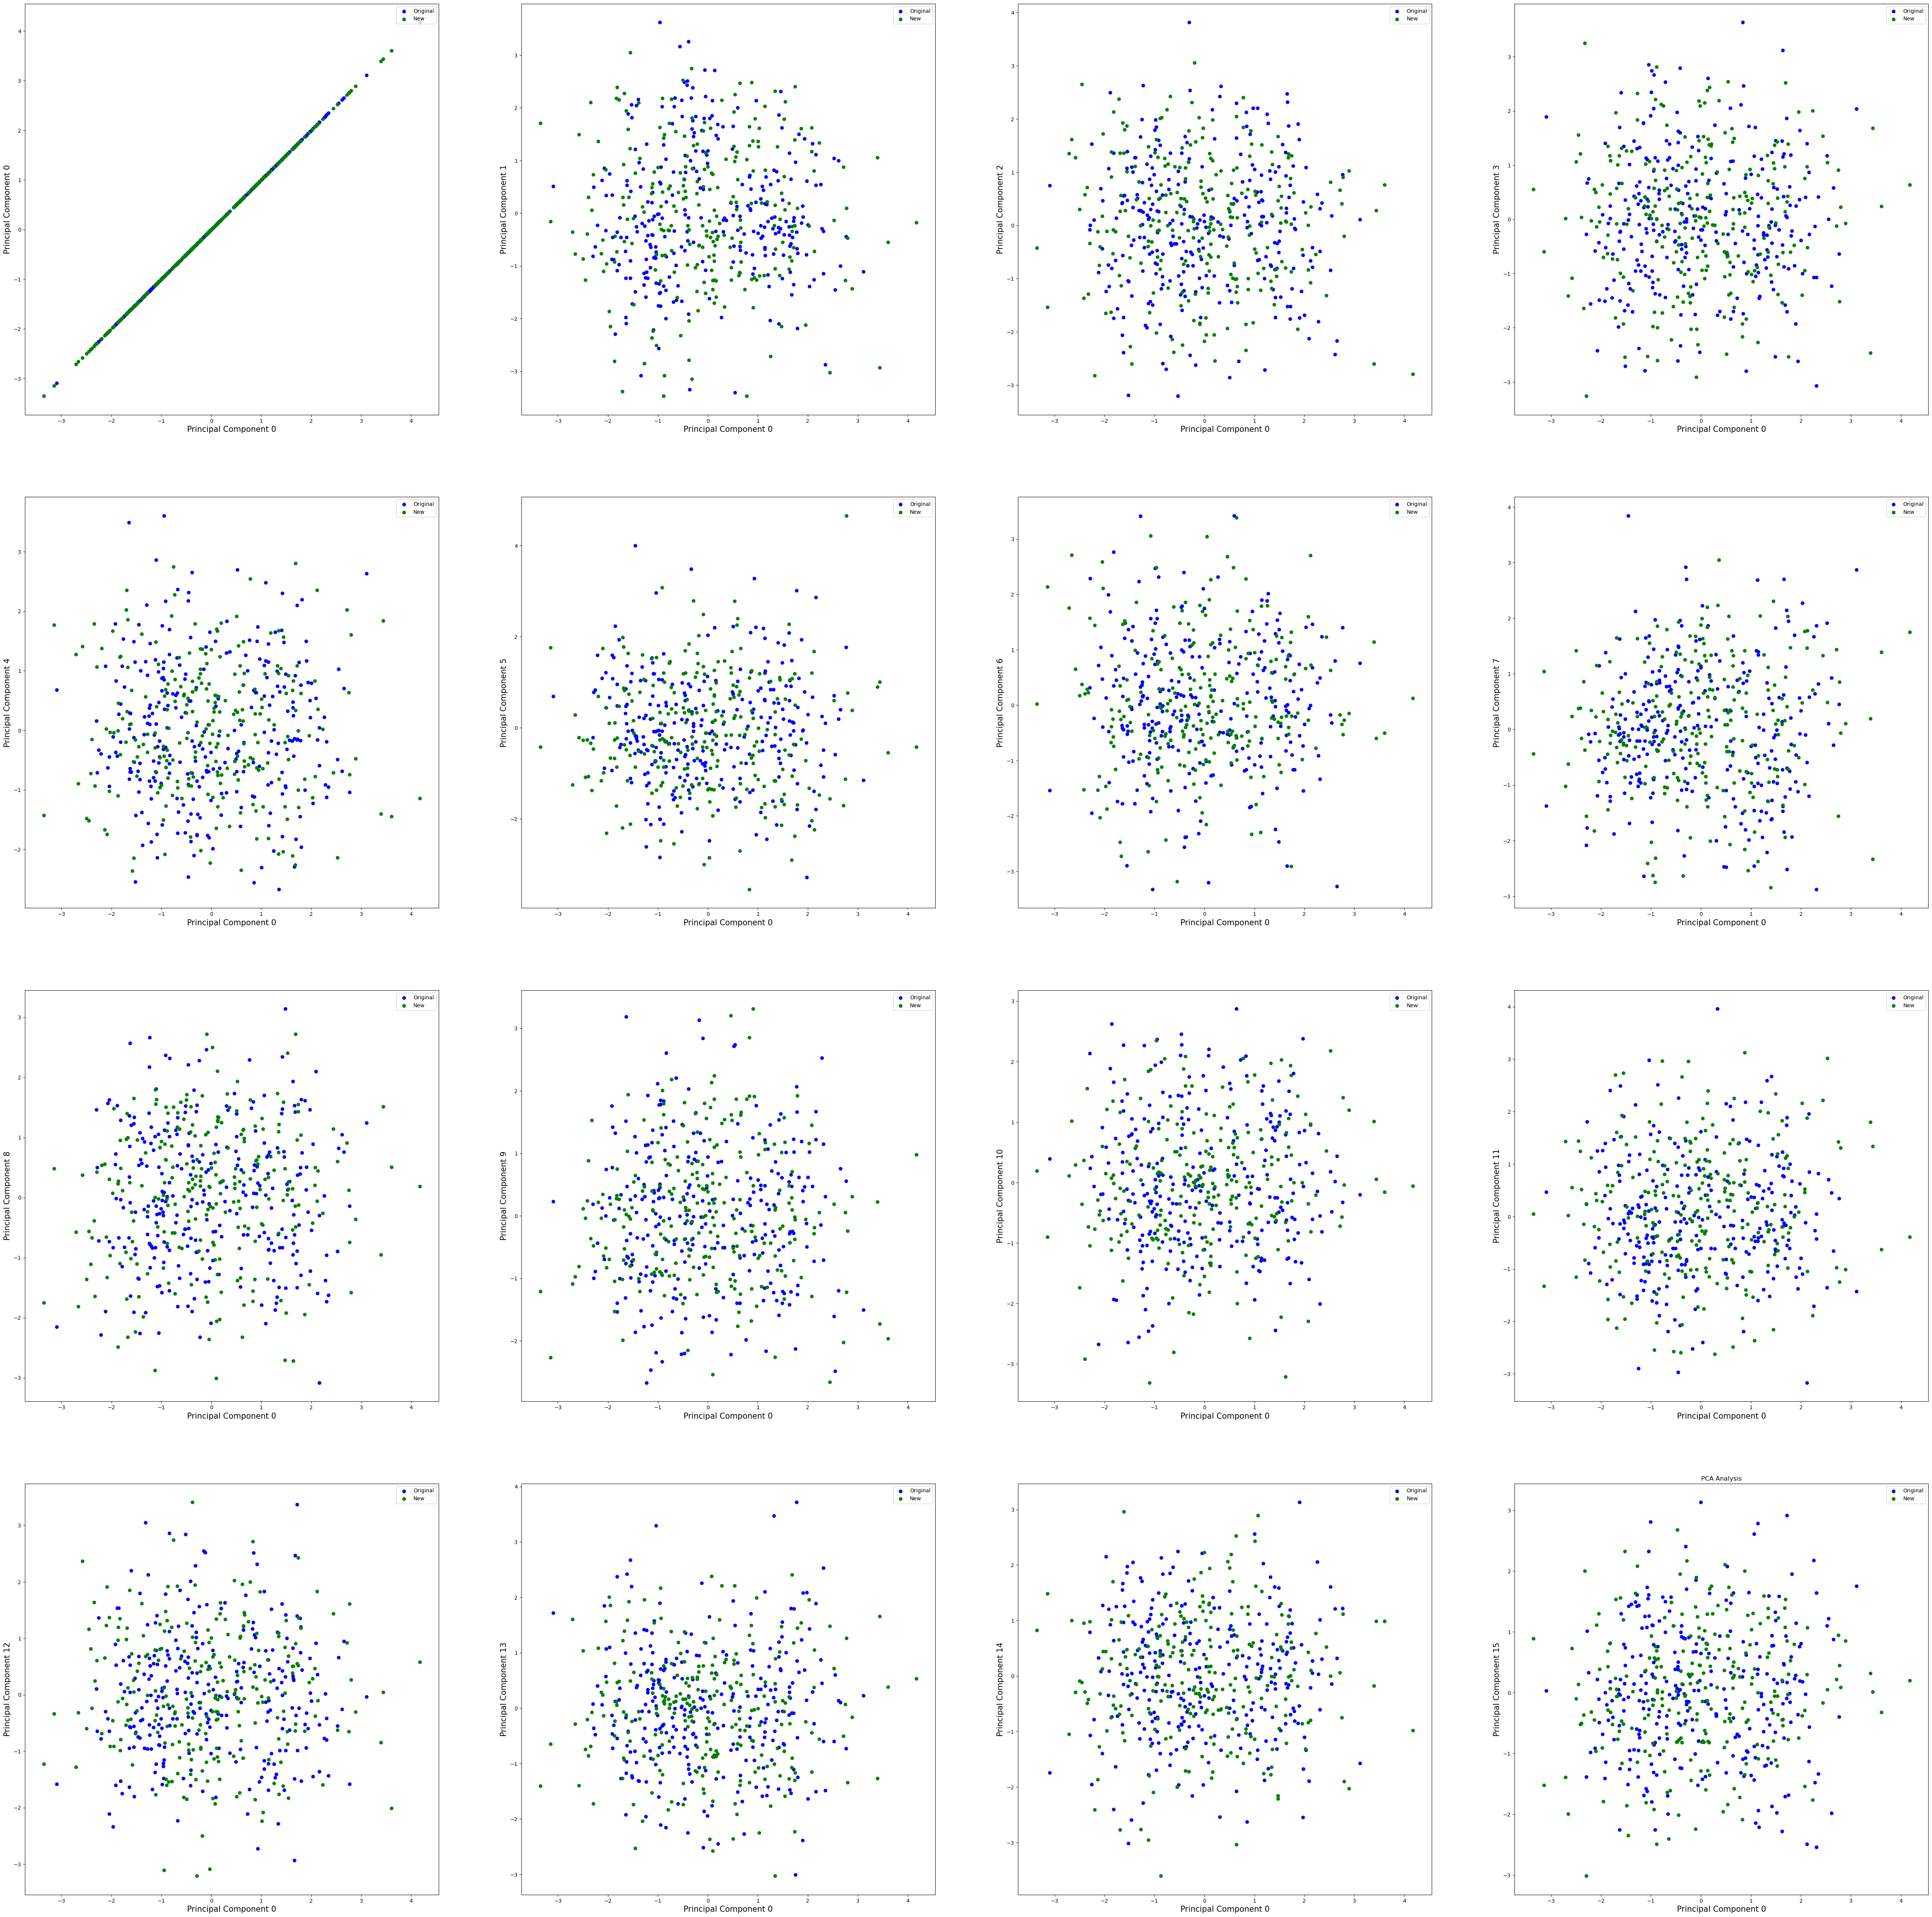

In [5]:
num_components = 32

num_new_emb = 250
scaling = 1

pca = PCA(n_components=num_components)
reduced = pca.fit_transform(emb)
emb_up_first = pca.inverse_transform(reduced*scaling)
emb_up_after = pca.inverse_transform(reduced) *scaling

mu_reduced = np.mean(reduced, axis=0)
sigma_reduced = np.cov(reduced, rowvar=False)

new_emb_reduced = np.random.multivariate_normal(mu_reduced, sigma_reduced, num_new_emb)
new_emb = pca.inverse_transform(new_emb_reduced)

fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(65,65)

i = 0
for row in ax:
    for col in row:
        col.set_xlabel('Principal Component '+str(0), fontsize = 15)
        col.set_ylabel('Principal Component '+str(i), fontsize = 15)
        col.scatter(reduced[:,0], reduced[:,i], c="b", label="Original")
        col.scatter(new_emb_reduced[:,0], new_emb_reduced[:,i], c="g", label="New")
        col.legend(loc='upper right')
        i += 1
plt.title('PCA Analysis')
plt.show()

# Graphs

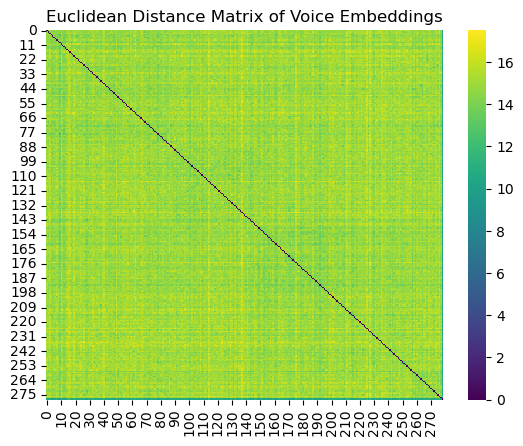

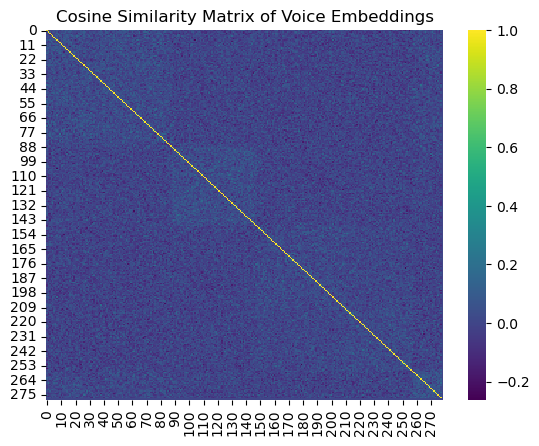

In [6]:
euclidean_dist_matrix = squareform(pdist(emb, 'euclidean'))
sns.heatmap(euclidean_dist_matrix, cmap='viridis')
plt.title('Euclidean Distance Matrix of Voice Embeddings')
plt.show()

cos_sim_matrix = cosine_similarity(emb)
sns.heatmap(cos_sim_matrix, cmap='viridis')
plt.title('Cosine Similarity Matrix of Voice Embeddings')
plt.show()